# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Workshop/Social_Network_Ads.csv')

#Data Visualization



In [ ]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Seperating Input and Output Values


In [ ]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

####We are considering  Age and Estimated Salary as Inputs and Purchased Column as Output 

In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# Creating Training and Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

# Importing Perceptron Model

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(eta0 =1, random_state = 165,penalty='l2',alpha=0.0038)

# Normalizing the Training and Testing Inputs


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)

###Formula Used for MinMax Scalar

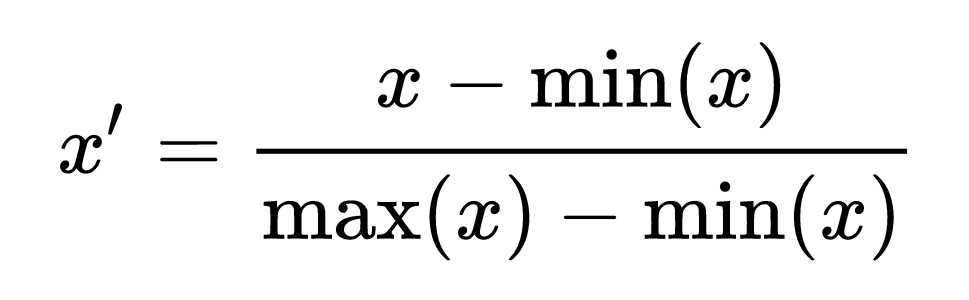

# Fitting the Dataset and Training the Model

In [ ]:
model.fit(x_train,y_train)

Perceptron(alpha=0.0038, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=165, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

# Prediction using Testing Dataset

In [ ]:
y_pred = model.predict(x_test)

# Determining Accuracy of the Model

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'The Accuracy of the Model is {accuracy_score(y_pred,y_test)}')
print(classification_report(y_pred,y_test))

The Accuracy of the Model is 0.88
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        56
           1       0.88      0.84      0.86        44

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



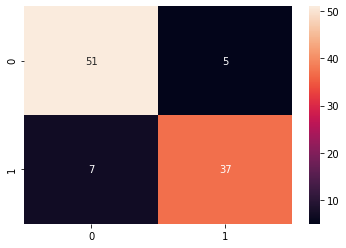

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

###Representation of a Confusion Matrix

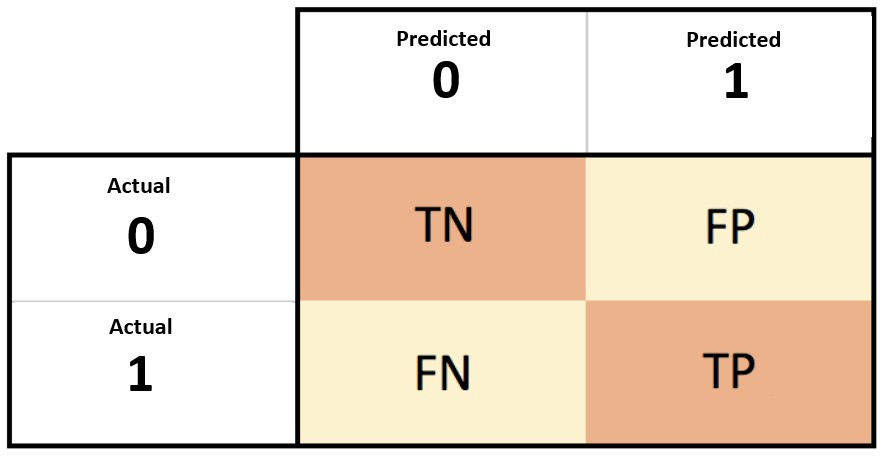

# Tuning the parameters of the Model

In [ ]:
from sklearn.model_selection import GridSearchCV
model =  Perceptron()
param = {
    'penalty' : ['l2','l1','elasticnet']
}
grid = GridSearchCV(model,param,cv=2)
grid.fit(x_train,y_train)
grid.best_params_

{'penalty': 'l2'}

In [ ]:
eta0 = list(range(1,10))
alpha = list(range(1,50))
random_state = list(range(150,170))
for x in eta0:
  for y in alpha:
    for a in random_state:
      model = Perceptron(eta0=x,alpha = y/10000,penalty='l2',random_state=a)
      model.fit(x_train,y_train)
      y_pred = model.predict(x_test)
      acc = accuracy_score(y_pred,y_test)
      if acc >= 0.88:
        print(f'eta0 = {x} alpha = {y/10000}  random_state = {a} accuracy = {acc}')

eta0 = 1 alpha = 0.0038  random_state = 165 accuracy = 0.88
eta0 = 2 alpha = 0.0019  random_state = 165 accuracy = 0.88
eta0 = 8 alpha = 0.0048  random_state = 163 accuracy = 0.88
